In [1]:
!pip3 install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 31.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.3 MB 25.2 MB/s 
     |████████████████████████████████| 4.4 MB 57.2 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 260 kB 75.9 MB/s 
     |████████████████████████████████| 46 kB 4.7 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641946 sha256=10dd8175ddffbdfcde33890bf5161ebd5d35e00d6060f455ffbbb739a60d3449
  Stored in directory: /root/.cache/pip/wheels/26/57/ce/ca63ad74b90273f9a682028d187645a42dce5c5255228d46c8
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7043 sha256=4f051c19e1f539b852b7ad85c521a5e52c58917762ea9298e732632893c660ea
  St

In [3]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import sklearn.metrics
import autosklearn.classification
import autosklearn.metrics
import time

#LOADING DATA

In [4]:
TrainDataSet= load_breast_cancer()
df = pd.DataFrame(data=TrainDataSet.data, columns=TrainDataSet.feature_names)
df['target'] = TrainDataSet.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#EXPLORATORY DATA ANALYSIS OF BC

In [ ]:
fig = px.histogram(df, 
                   x='target',
                   color = 'target',
                   text_auto=True,
                   color_discrete_sequence=px.colors.qualitative.G10,
                   template='simple_white',
                   labels={"target": "Target"},
                   title='Target Value Count')

fig.update_layout(bargap=0.1, xaxis_title="Target",yaxis_title="Count")
fig.show()

#DATA CLEANING

In [5]:
input_cols = df.columns[:-1]
input_cols


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [6]:
target_col =  df.columns[-1]
target_col

'target'

In [7]:
inputs_df = df[list(input_cols)].copy()
inputs_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
targets = df[(target_col)]
targets

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

#AUTOML MODEL

In [9]:
X = inputs_df
y = targets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size = 0.2, random_state=1)

In [10]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=100,
    per_run_time_limit=10
)

In [11]:
start = time.time()
history = automl.fit(X_train, y_train, dataset_name="Breast Cancer")
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 96.14972925186157s


#Evaluar red

In [12]:
predictions = automl.predict(X_test)
print("Precision", sklearn.metrics.precision_score(y_test, predictions))
print("Recall", sklearn.metrics.recall_score(y_test, predictions))
print("Loss", sklearn.metrics.log_loss(y_test, predictions))

Precision 0.935064935064935
Recall 1.0
Loss 1.5148936838746005


In [13]:
automl.show_models()

{2: {'model_id': 2,
  'rank': 1,
  'cost': 0.0066225165562914245,
  'ensemble_weight': 0.02,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7fc89708e990>,
  'balancing': Balancing(random_state=1),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7fc89702f690>,
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7fc89702fa50>,
  'sklearn_classifier': RandomForestClassifier(max_features=5, n_estimators=512, n_jobs=1,
                         random_state=1, warm_start=True)},
 4: {'model_id': 4,
  'rank': 2,
  'cost': 0.013245033112582738,
  'ensemble_weight': 0.02,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7fc89707ac10>,
  'balancing': Balancing(random_state=1, strategy='weighting'),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePrepro

In [14]:
automl.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
2,1,0.02,random_forest,0.006623,1.438864
14,5,0.04,mlp,0.006623,1.693078
18,4,0.06,extra_trees,0.006623,2.677282
27,3,0.04,sgd,0.006623,0.955199
31,2,0.06,libsvm_svc,0.006623,1.025755
4,10,0.02,mlp,0.013245,1.448435
7,9,0.04,random_forest,0.013245,1.618780
13,11,0.02,random_forest,0.013245,1.688340
15,7,0.04,random_forest,0.013245,1.727685


In [16]:
df_cv_results = pd.DataFrame(automl.cv_results_)
df_cv_results

,mean_test_score,rank_test_scores,mean_fit_time,params,status,budgets,param_balancing:strategy,param_classifier:__choice__,param_data_preprocessor:__choice__,param_feature_preprocessor:__choice__,...,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_max,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_min,param_feature_preprocessor:fast_ica:n_components,param_feature_preprocessor:kernel_pca:coef0,param_feature_preprocessor:kernel_pca:degree,param_feature_preprocessor:kernel_pca:gamma,param_feature_preprocessor:nystroem_sampler:coef0,param_feature_preprocessor:nystroem_sampler:degree,param_feature_preprocessor:nystroem_sampler:gamma,param_feature_preprocessor:select_rates_classification:mode
0,0.993377,1,1.438864,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,random_forest,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.986755,10,0.956634,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,mlp,feature_type,feature_agglomeration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.986755,10,1.448435,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,mlp,feature_type,feature_agglomeration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.980132,20,1.753917,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,random_forest,feature_type,extra_trees_preproc_for_classification,...,0.784540,0.255451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.993377,1,1.034971,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,mlp,feature_type,fast_ica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.986755,10,1.618780,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,random_forest,feature_type,extra_trees_preproc_for_classification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.993377,1,1.295569,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,extra_trees,feature_type,polynomial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.966887,27,1.545804,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,extra_trees,feature_type,extra_trees_preproc_for_classification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.980132,20,0.993186,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,gradient_boosting,feature_type,liblinear_svc_preprocessor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.986755,10,2.011014,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,random_forest,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Predecir nuevos resultados

In [17]:
y_pred = automl.predict(X_test)
y_test = np.array(y_test)

error = 0;

for i in range(len(y_test)):
  print("valor real: ", y_test[i])
  print("valor estimado: ", y_pred[i])
  if(y_test[i] != y_pred[i]):
    error = error + 1;
  print("---------------------------------- ")

error_rate = error  / len(y_test) 
print("Error: ",error_rate)

valor real:  1
valor estimado:  1
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  1
valor estimado:  1
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  0
valor estimado:  1
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  1
valor estimado:  1
---------------------------------- 
valor real:  1
valor estimado:  1
---------------------------------- 
valor real:  1
valor estimado:  1
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  1
valor estimado:  1
---------------------------------- 
valor real:  1
valor

Curva de precision

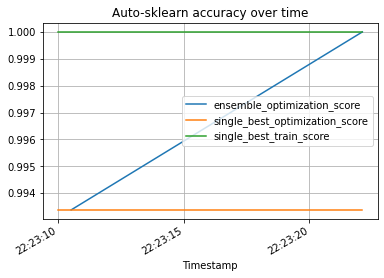

In [19]:
poT = automl.performance_over_time_
poT.plot(
    x="Timestamp",
    kind="line",
    legend=True,
    title="Auto-sklearn accuracy over time",
    grid=True,
)
plt.show()